# Machine Learning — Predicting Subscription for Bank 

# Data Preparation: Importing data and Inspection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#membaca file csv
dataset= pd.read_csv('Bank.csv')

#menampilkan list kolom dari dataset
print('Menampilkan list kolom dari dataset:')
print(list(dataset.columns))

#menampilkan 10 konten teratas dari dataset
print('\nMenampilkan 10 data teratas:')
print(dataset.head(10))

#menampilkan 10 konten terbawah dari dataset
print('\nMenampilkan 10 data terbawah:')
print(dataset.tail(10))

print('\nMenampilkan Info dataset:')
print(dataset.info())

#melihat struktur kolom dan baris dari dataset
print('\nMenampilkan Shape dataset:')
print(dataset.shape)

#melihat statistik desriptif dari dataset
print('\nMenampilkan Statistik dekstriptif dataset:')
print(dataset.describe())

Menampilkan list kolom dari dataset:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'communication_type ', 'last_contact_month', 'last_contact_day_of_week', 'last_contact_duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'subscribe']

Menampilkan 10 data teratas:
   age         job   marital          education  default housing loan  \
0   44     teacher   married           basic.4y  unknown     yes   no   
1   53  technician   married            unknown       no      no   no   
2   28  management    single  university.degree       no     yes   no   
3   39    services   married        high.school       no      no   no   
4   55     retired   married           basic.4y       no     yes   no   
5   30  management  divorced           basic.4y       no     yes   no   
6   37     teacher   married           basic.4y       no     yes   no   
7   39     teacher  divorced           basic.

In [2]:
#menghapus kolom yang tidak digunakan
del dataset['default']
del dataset['communication_type ']
del dataset['last_contact_month']
del dataset['last_contact_day_of_week']
del dataset['last_contact_duration']
del dataset['campaign']
del dataset['pdays']
del dataset['previous']

In [3]:
#melihat kembali dataset yang sudah diubah
dataset.head()

,age,job,marital,education,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribe
0,44,teacher,married,basic.4y,yes,no,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
#melihat kategori yang ada pada kolom 'marital'
dataset['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [5]:
import numpy as np
#mengubah "basic.9y" "basic.6y" dan "basic.4y" menjadi katagori basic
dataset['education']=np.where(dataset['education'] =='basic.9y', 'Basic', dataset['education'])
dataset['education']=np.where(dataset['education'] =='basic.6y', 'Basic', dataset['education'])
dataset['education']=np.where(dataset['education'] =='basic.4y', 'Basic', dataset['education'])

In [6]:
#melihat kategori yang ada pada kolom 'education'
dataset['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [7]:
#melihat katagori yang ada pada kolom 'job'
dataset['job'].unique()

array(['teacher', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [8]:
#Cek apakah ada data yang hilang
print("\n Cek missing value")
print(dataset.isnull().sum().sum())


 Cek missing value
0


# Data Exploration 

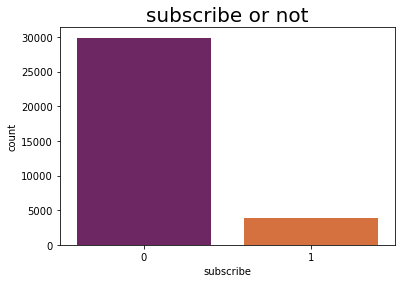

<Figure size 432x288 with 0 Axes>

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
dataset['subscribe'].value_counts() #menghitung jumlah data pada kolom suscribe
sns.countplot(x='subscribe',data=dataset,palette='inferno') #membuat grafik 
plt.title('subscribe or not',fontsize = 20)
plt.show()
plt.savefig('count_plot')

In [10]:
count_no_sub = len(dataset[dataset['subscribe']==0.0]) #mengetahui jumlah yang bukan subsrciber
count_sub = len(dataset[dataset['subscribe']==1.0]) #mengetahui jumlah yang subsriber
pct_of_sub = count_sub/(count_no_sub+count_sub) #mengetahui persentasi subscriber
print("percentage of subscription", pct_of_sub*100)
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub) #mengetahui persentasi yang bukan subscriber
print("percentage of no subscription is", pct_of_no_sub*100)

percentage of subscription 11.362557836042235
percentage of no subscription is 88.63744216395777


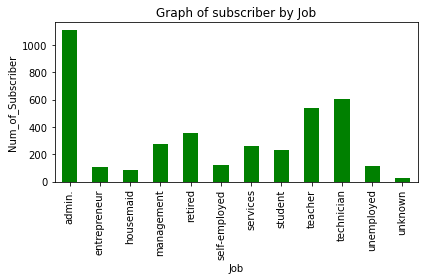

In [11]:
import matplotlib.pyplot as plt
#membuat grafik jumlah subscriber berdasarkan pekerjaan nasabah
plt.clf()
df_job = dataset.groupby(['job'])['subscribe'].sum()
df_job.plot(x='job', y='subscribe', kind='bar', title='Graph of subscriber by Job',color='green')
plt.xlabel('Job')
plt.ylabel('Num_of_Subscriber')
plt.tight_layout()
plt.show()

In [10]:
#mengkonversi kolom dari tipe object menjadi tipe int untuk memudahkan proses regression
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'job'
LE = LabelEncoder()
dataset['job'] = LE.fit_transform(dataset['job'])
print(LE.classes_)
print(np.sort(dataset['job'].unique()))
print(' ')

# Convert feature/column 'education'
LE = LabelEncoder()
dataset['education'] = LE.fit_transform(dataset['education'])
print(LE.classes_)
print(np.sort(dataset['education'].unique()))

# Convert feature/column 'marital'
LE = LabelEncoder()
dataset['marital'] = LE.fit_transform(dataset['marital'])
print(LE.classes_)
print(np.sort(dataset['marital'].unique()))

# Convert feature/column 'housing'
LE = LabelEncoder()
dataset['housing'] = LE.fit_transform(dataset['housing'])
print(LE.classes_)
print(np.sort(dataset['housing'].unique()))

# Convert feature/column 'loan'
LE = LabelEncoder()
dataset['loan'] = LE.fit_transform(dataset['loan'])
print(LE.classes_)
print(np.sort(dataset['loan'].unique()))



['admin.' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'teacher' 'technician' 'unemployed'
 'unknown']
[ 0  1  2  3  4  5  6  7  8  9 10 11]
 
['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
[0 1 2 3 4 5 6 7]
['divorced' 'married' 'single' 'unknown']
[0 1 2 3]
['no' 'unknown' 'yes']
[0 1 2]
['no' 'unknown' 'yes']
[0 1 2]


In [12]:
# Features variable
#menggunakan semua kolom kecuali kolom 'subscribe'
X = dataset.drop(['subscribe'],axis=1)

# Target variable
#menggunakan kolom subscribe
y = dataset['subscribe']

# Menggunakan model Logistic Regression

In [14]:
from sklearn.model_selection import train_test_split
#membagi train dan text kedalam 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred=logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Confusion Matrix:
 [[5911  100]
 [ 563  170]]

Classification report
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      6011
           1       0.63      0.23      0.34       733

    accuracy                           0.90      6744
   macro avg       0.77      0.61      0.64      6744
weighted avg       0.88      0.90      0.88      6744



C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 432x288 with 0 Axes>

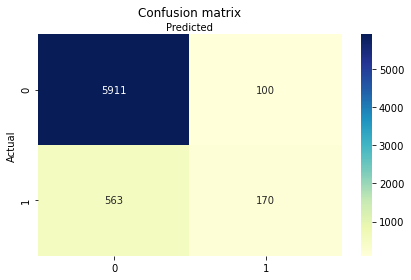

In [16]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.9016903914590747
Precision: 0.9016903914590747
Recall : 0.9016903914590747


# Regression menggunakan model Decision Tree Classifier

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#membagi train dan text kedalam 80% training dan 20% testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
y1_pred = decision_tree.fit(X1_train,y1_train)
# evaluating the decision_tree performance
print('Training Accuracy :', decision_tree.score(X1_train, y1_train))
print('Testing Accuracy :', decision_tree.score(X1_test, y1_test))

Training Accuracy : 0.9849844282960106
Testing Accuracy : 0.8499406880189798


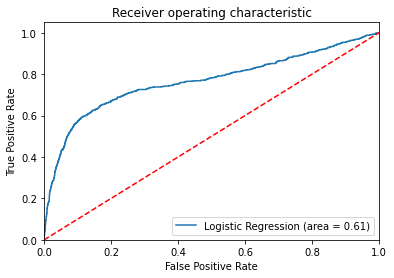

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()